<a href="https://colab.research.google.com/github/ylmgrbzz/Marine_Oil_Discharge_Analysis/blob/main/Marine_Oil_Discharge_MachineLearning_XGBClassifier_LGBMClassifier_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from shapely.geometry import Point, Polygon

def create_no_go_zones(df):
    """
    Creates a dictionary of no-go zones as polygons from the dataframe.

    :param df: DataFrame with no-go area boundary points
    :return: Dictionary of no-go zones with polygons
    """
    # Initialize an empty dictionary to store no-go zones
    no_go_zones = {}

    # Iterate over unique OBJECTIDs in the dataframe
    for zone_id in df['OBJECTID'].unique():
        # Extract points for the current zone based on OBJECTID
        zone_points = df[df['OBJECTID'] == zone_id][['x', 'y']].values
        # Create a polygon from the extracted points
        no_go_zones[zone_id] = Polygon(zone_points)

    return no_go_zones

def is_in_no_go_zone(lat, lon, no_go_zones):
    """
    Determines if a given latitude and longitude is within any no-go zone.

    :param lat: Latitude of the ship's current position
    :param lon: Longitude of the ship's current position
    :param no_go_zones: Dictionary of no-go zones as polygons
    :return: Boolean indicating if in a no-go zone, and the ID of the zone if true
    """
    # Create a Point object representing the ship's current position
    point = Point(lon, lat)

    # Iterate over the dictionary of no-go zones
    for zone_id, zone in no_go_zones.items():
        # Check if the ship's position is within the current no-go zone
        if zone.contains(point):
            # Return True and the ID of the zone if inside a no-go zone
            return True, zone_id

    # Return False and None if not inside any no-go zone
    return False, None

# Read the CSV file
file_path = 'veri.csv'  # Replace with the path to your CSV file
no_go_areas_df = pd.read_csv(file_path)

# Create no-go zones
no_go_zones = create_no_go_zones(no_go_areas_df)

# Example usage
# Replace these with the ship's actual GPS coordinates
current_lat = 0  # Example latitude
current_lon = 0  # Example longitude

# Check if the ship is in a no-go zone
in_no_go_zone, zone_id = is_in_no_go_zone(current_lat, current_lon, no_go_zones)

# Provide a warning if the ship is in a no-go zone
if in_no_go_zone:
    print(f"The ship is in a no-go zone! Zone ID: {zone_id}")
else:
    print("The ship is in a safe zone.")


The ship is in a safe zone.


In [ ]:
def enter_manual_inputs():
    """
    Function to collect manual inputs required for the ODME operation.
    """
    # Create an empty dictionary to store user inputs
    inputs = {}

    # Collect user input for the duration of the last oily water transfer to the slop tank
    inputs['last_oily_water_transfer'] = float(input("Enter the duration of the last oily water transfer to the slop tank (in hours): "))

    # Check if the company was informed one day before the operation
    inputs['company_informed'] = input("Was the company informed one day before the operation (yes/no)? ").lower() == 'yes'

    # Check if at least 24 hours were waited for the settlement of the oily mixture
    inputs['wait_24hrs_settlement'] = input("Waited at least 24 hours for the settlement of the oily mixture (yes/no)? ").lower() == 'yes'

    # Check if the current wind speed is less than 5 on the Beaufort scale
    inputs['wind_speed'] = float(input("Enter the current wind speed (Beaufort scale): ")) < 5

    # Check if the current sea height is less than 4 on the Beaufort scale
    inputs['sea_height'] = float(input("Enter the current sea height (Beaufort scale): ")) < 4

    # Check if the current swell height is less than 4 on the Beaufort scale
    inputs['swell_height'] = float(input("Enter the current swell height (Beaufort scale): ")) < 4

    # Check if the current ship rolling degree is less than 5
    inputs['ship_rolling'] = float(input("Enter the current ship rolling degree: ")) < 5

    # Collect the initial quantity of the oily mixture
    inputs['initial_quantity_oily_mixture'] = float(input("Enter the initial quantity of the oily mixture: "))

    # Collect the initial quantity of oil
    inputs['initial_quantity_oil'] = float(input("Enter the initial quantity of oil: "))

    # Collect the total cargo carried
    inputs['total_cargo_carried'] = float(input("Enter the total cargo carried: "))

    # Check if the ODME self-test was carried out satisfactorily
    inputs['odme_self_test'] = input("Was the ODME self-test carried out satisfactorily (yes/no)? ").lower() == 'yes'

    # Check if the ODME zero calibration test was carried out satisfactorily
    inputs['odme_zero_calibration_test'] = input("Was the ODME zero calibration test carried out satisfactorily (yes/no)? ").lower() == 'yes'

    # Check if the total oil limit should be reset to zero (allowed only once for each operation)
    inputs['reset_total_oil_limit'] = input("Reset the total oil limit to zero. Only one time is allowed for each operation (yes/no)? ").lower() == 'yes'

    # Collect the oil type from the maker's manual
    inputs['oil_type'] = input("Enter the oil type from the maker's manual: ")

    return inputs

# Load the CSV file
file_path = 'veri.csv'  # Replace with your CSV file path
no_go_areas_df = pd.read_csv(file_path)

# Create no-go zones
no_go_zones = create_no_go_zones(no_go_areas_df)

# Collect manual inputs
manual_inputs = enter_manual_inputs()

# Check if the ship is in a no-go zone (use real-time GPS coordinates)
# current_lat = 0  # Replace with real latitude
# current_lon = 0  # Replace with real longitude
# in_no_go_zone, zone_id = is_in_no_go_zone(current_lat, current_lon, no_go_zones)
# print(in_no_go_zone, zone_id)


Enter the duration of the last oily water transfer to the slop tank (in hours): 35
Was the company informed one day before the operation (yes/no)? 35
Waited at least 24 hours for the settlement of the oily mixture (yes/no)? yes
Enter the current wind speed (Beaufort scale): 35
Enter the current sea height (Beaufort scale): 35
Enter the current swell height (Beaufort scale): 35
Enter the current ship rolling degree: 35
Enter the initial quantity of the oily mixture: 35
Enter the initial quantity of oil: 35
Enter the total cargo carried: 35
Was the ODME self-test carried out satisfactorily (yes/no)? yes
Was the ODME zero calibration test carried out satisfactorily (yes/no)? yes
Reset the total oil limit to zero. Only one time is allowed for each operation (yes/no)? yes
Enter the oil type from the maker's manual: 35


In [ ]:
pip install ephem


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.4 MB/s eta 0:00:00


In [ ]:
import ephem
from datetime import datetime

def calculate_sunrise_sunset(lat, lon, utc_offset):
    """
    Calculates sunrise and sunset times based on GPS position and UTC offset.

    :param lat: Latitude of the ship's current position
    :param lon: Longitude of the ship's current position
    :param utc_offset: UTC offset of the ship's location in hours
    :return: Tuple containing sunrise and sunset times as datetime objects
    """
    # Create an observer object for ephem module
    observer = ephem.Observer()
    observer.lat = str(lat)
    observer.lon = str(lon)
    observer.elevation = 0  # Sea level
    observer.date = datetime.utcnow()

    # Apply UTC offset to the observer's date
    observer.date += ephem.hours(utc_offset)

    # Calculate sunrise and sunset using ephem module
    sunrise = observer.previous_rising(ephem.Sun())
    sunset = observer.next_setting(ephem.Sun())

    # Convert sunrise and sunset times to datetime objects
    return sunrise.datetime(), sunset.datetime()

# Replace these values with the ship's real-time GPS coordinates
current_lat = 0  # Example latitude
current_lon = 0  # Example longitude

# Check if the ship is in a no-go zone using real-time GPS coordinates
in_no_go_zone, zone_id = is_in_no_go_zone(current_lat, current_lon, no_go_zones)

# Replace with the actual UTC offset of the ship's location
utc_offset = 3  # Example UTC offset

# Calculate sunrise and sunset based on the ship's current location
sunrise, sunset = calculate_sunrise_sunset(current_lat, current_lon, utc_offset)

# Check if it's daytime
daytime = sunrise < datetime.utcnow() < sunset

# Display an alert if the ship is in a forbidden area during daytime
if in_no_go_zone and daytime:
    print("Alert: The ship is in a forbidden area during daytime.")
else:
    print("The ship is in a permitted area.")


The ship is in a permitted area.


In [ ]:
def is_ship_en_route(course_change_angle):
    """
    Checks if the ship is en route based on the course change angle.

    :param course_change_angle: The angle representing the change in the ship's course.
    :return: True if the ship is en route (course change angle less than 90 degrees), False otherwise.
    """
    return abs(course_change_angle) < 90

# Load the CSV file
file_path = 'veri.csv'  # Replace with your CSV file path
no_go_areas_df = pd.read_csv(file_path)

# Create no-go zones
no_go_zones = create_no_go_zones(no_go_areas_df)

# Collect manual inputs
manual_inputs = enter_manual_inputs()

# Check if the ship is in a no-go zone and it's daytime
# Use real-time GPS coordinates
current_lat = 0  # Replace with real latitude
current_lon = 0  # Replace with real longitude
in_no_go_zone, zone_id = is_in_no_go_zone(current_lat, current_lon, no_go_zones)

# Calculate sunrise and sunset
utc_offset = 3  # Replace with the actual UTC offset of the ship's location
sunrise, sunset = calculate_sunrise_sunset(current_lat, current_lon, utc_offset)

# Check if it's daytime
daytime = sunrise < datetime.utcnow() < sunset

# Check if the ship is en route with a course change of less than 90 degrees
course_change_angle = float(input("Enter the course change angle (in degrees): "))
en_route = is_ship_en_route(course_change_angle)

# Display an alert if the ship is in a forbidden area during daytime and the course change is too high
if in_no_go_zone and daytime and en_route:
    print("Alert: The ship is in a forbidden area during daytime, and the course change is too high.")
else:
    print("The ship is in a permitted area.")


Enter the duration of the last oily water transfer to the slop tank (in hours): 45
Was the company informed one day before the operation (yes/no)? yes
Waited at least 24 hours for the settlement of the oily mixture (yes/no)? yes
Enter the current wind speed (Beaufort scale): 34
Enter the current sea height (Beaufort scale): 34
Enter the current swell height (Beaufort scale): 34
Enter the current ship rolling degree: 34
Enter the initial quantity of the oily mixture: 34
Enter the initial quantity of oil: 34
Enter the total cargo carried: 34
Was the ODME self-test carried out satisfactorily (yes/no)? yes
Was the ODME zero calibration test carried out satisfactorily (yes/no)? yes
Reset the total oil limit to zero. Only one time is allowed for each operation (yes/no)? yes
Enter the oil type from the maker's manual: 34
Enter the course change angle (in degrees): 34
The ship is in a permitted area.


In [ ]:
from datetime import timedelta

def calculate_operation_time(total_oily_mixture, discharge_rate):
    """
    Calculates the operation time based on the total oily mixture and discharge rate.

    :param total_oily_mixture: The total quantity of oily mixture available for discharge (in liters).
    :param discharge_rate: The rate of discharge of oil content (in liters per hour).
    :return: The estimated operation time as a timedelta object.
    :raises ValueError: If discharge rate is not greater than zero.
    """
    # Check if the discharge rate is valid
    if discharge_rate <= 0:
        raise ValueError("Discharge rate must be greater than zero.")

    # Calculate operation time in hours
    operation_time_hours = total_oily_mixture / discharge_rate

    # Convert operation time to timedelta object
    operation_time = timedelta(hours=operation_time_hours)

    return operation_time


In [ ]:
from datetime import datetime, timedelta

# Get the course change angle from user input
course_change_angle = float(input("Enter the course change angle (in degrees): "))

# Check if the ship is en route
en_route = is_ship_en_route(course_change_angle)

# Check if the ship is in a no-go zone, it's daytime, and it's en route
if in_no_go_zone and daytime and en_route:
    print("Alert: The ship is in a forbidden area during daytime and the course change is too high.")
else:
    # Continue with the calculation of operation time

    # Get discharge rate from ODME (in m³/h) from user input
    discharge_rate = float(input("Enter the discharge rate from ODME (in m³/h): "))

    # Get the initial quantity of oily mixture from manual inputs
    total_oily_mixture = manual_inputs['initial_quantity_oily_mixture']

    try:
        # Calculate the estimated operation time
        operation_time = calculate_operation_time(total_oily_mixture, discharge_rate)
        print(f"Estimated operation time: {operation_time}")
    except ValueError as e:
        print(f"Error: {e}")


Enter the course change angle (in degrees): 35
Enter the discharge rate from ODME (in m³/h): 23
Estimated operation time: 1:28:41.739130


In [ ]:
def check_discharge_conditions(instantaneous_rate, total_discharged, cargo_quantity):
    """
    Checks if the discharge conditions are met.

    :param instantaneous_rate: Instantaneous rate of discharge in liters per nautical mile
    :param total_discharged: Total quantity of oil discharged
    :param cargo_quantity: Total quantity of the particular cargo
    :return: True if conditions are met, False otherwise
    """
    # Define the maximum allowed values
    max_instantaneous_rate = 30  # Maximum instantaneous rate in liters per nautical mile
    max_total_fraction = 1 / 30000  # Maximum fraction for the total quantity of oil discharged

    # Check if the conditions are met
    return instantaneous_rate <= max_instantaneous_rate or (total_discharged / cargo_quantity) <= max_total_fraction


In [ ]:
if in_no_go_zone and daytime and en_route:
    # Alert if the ship is in a forbidden area during the daytime with a high course change
    print("Alert: The ship is in a forbidden area during daytime and the course change is too high.")
else:
    # Continue with the calculation of operation time and discharge conditions

    # Get discharge rate from ODME (Oil Discharge Monitoring Equipment) in cubic meters per hour
    discharge_rate = float(input("Enter the discharge rate from ODME (in m³/h): "))

    # Get the initial quantity of oily mixture from manual inputs
    total_oily_mixture = manual_inputs['initial_quantity_oily_mixture']

    try:
        # Calculate the estimated operation time based on the total oily mixture and discharge rate
        operation_time = calculate_operation_time(total_oily_mixture, discharge_rate)
        print(f"Estimated operation time: {operation_time}")

        # Assume ODME calculates these values in real-time
        # Get the instantaneous rate of discharge in liters per nautical mile
        instantaneous_rate = float(input("Enter the instantaneous rate of discharge (in liters per nautical mile): "))

        # Get the total quantity of oil discharged in liters
        total_discharged = float(input("Enter the total quantity of oil discharged (in liters): "))

        # Get the total quantity of the particular cargo carried by the ship
        cargo_quantity = manual_inputs['total_cargo_carried']

        # Check discharge conditions using the check_discharge_conditions function
        if check_discharge_conditions(instantaneous_rate, total_discharged, cargo_quantity):
            print("Discharge conditions are met.")
        else:
            print("Alert: Discharge conditions not met.")
    except ValueError as e:
        # Handle the case where there's an error in the calculation
        print(f"Error: {e}")


Enter the discharge rate from ODME (in m³/h): 23
Estimated operation time: 1:28:41.739130
Enter the instantaneous rate of discharge (in liters per nautical mile): 23
Enter the total quantity of oil discharged (in liters): 23
Discharge conditions are met.


In [ ]:
def time_to_no_go_zone(current_lat, current_lon, no_go_zones):
    """
    Calculate the time it would take to reach the nearest no-go zone based on the ship's current position and speed.
    """
    # Assume the ship's speed is 10 knots (replace with the actual speed)
    ship_speed_knots = 10

    # Calculate the distance to the nearest no-go zone
    min_distance = float('inf')
    for zone_id, zone in no_go_zones.items():
        distance = zone.distance(Point(current_lon, current_lat))
        if distance < min_distance:
            min_distance = distance

    # Calculate the time to reach the nearest no-go zone
    time_to_reach = min_distance / (ship_speed_knots * 1.852)  # Conversion from knots to km/h

    # Return the time as a timedelta object
    return timedelta(hours=time_to_reach)


In [ ]:
def estimate_time_of_completion(operation_time, current_lat, current_lon, no_go_zones, utc_offset):
    """
    Estimate the time of completion of the operation while considering the time it takes to reach the nearest no-go zone.
    """
    # Get the current UTC time
    current_utc_time = datetime.utcnow()

    # Calculate the time to reach the nearest no-go zone
    time_to_reach_no_go = time_to_no_go_zone(current_lat, current_lon, no_go_zones)

    # Adjust UTC time to the ship's local time
    current_local_time = current_utc_time + timedelta(hours=utc_offset)

    # Estimate the time of completion
    time_of_completion_utc = current_local_time + operation_time + time_to_reach_no_go

    # Return the estimated time of completion as a timedelta object
    return time_of_completion_utc - current_utc_time


In [ ]:
if in_no_go_zone and daytime and en_route:
    print("Alert: The ship is in a forbidden area during daytime, and the course change is too high.")
else:
    # Continue with the calculation of operation time and discharge conditions
    discharge_rate = float(input("Enter the discharge rate from ODME (in m³/h): "))
    total_oily_mixture = manual_inputs['initial_quantity_oily_mixture']

    try:
        # Calculate operation time
        operation_time = calculate_operation_time(total_oily_mixture, discharge_rate)

        # Check if operation time allows completion before reaching no-go areas
        if in_no_go_zone and operation_time > time_to_no_go_zone(current_lat, current_lon, no_go_zones):
            print("Alert: Operation cannot be completed before reaching a forbidden area.")
        else:
            print(f"Estimated operation time: {operation_time}")

            # Estimate time of completion while still in daylight
            time_to_complete = estimate_time_of_completion(operation_time, current_lat, current_lon, no_go_zones, utc_offset)

            if time_to_complete > sunset - datetime.utcnow():
                print("Alert: Operation may extend into nighttime.")
            else:
                print(f"Estimated time of completion: {datetime.utcnow() + time_to_complete}")

            # Assume ODME calculates these values
            instantaneous_rate = float(input("Enter the instantaneous rate of discharge (in liters per nautical mile): "))
            total_discharged = float(input("Enter the total quantity of oil discharged (in liters): "))
            cargo_quantity = manual_inputs['total_cargo_carried']

            # Check discharge conditions
            if check_discharge_conditions(instantaneous_rate, total_discharged, cargo_quantity):
                print("Discharge conditions are met.")
            else:
                print("Alert: Discharge conditions not met.")
    except ValueError as e:
        print(f"Error: {e}")


Enter the discharge rate from ODME (in m³/h): 23
Estimated operation time: 1:28:41.739130
Estimated time of completion: 2023-11-25 22:08:48.570734
Enter the instantaneous rate of discharge (in liters per nautical mile): 23
Enter the total quantity of oil discharged (in liters): 23
Discharge conditions are met.


In [2]:
pip install pandas scikit-learn xgboost lightgbm


In [38]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Read the data from the CSV file
data = pd.read_csv('veri.csv')

# Remove duplicate rows
data = data.drop_duplicates()

# Map the values in the 'decision' column to 1 and 0
data['decision'] = data['decision'].map({'permit': 1, 'prohibit': 0})

# Process categorical columns using LabelEncoder
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# Split the data into independent variables (X) and dependent variable (y)
X = data.drop('decision', axis=1)
y = data['decision']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Remove special characters from column names
X_train.columns = X_train.columns.str.replace('[^a-zA-Z0-9]', '_')
X_test.columns = X_test.columns.str.replace('[^a-zA-Z0-9]', '_')

# Create and train the XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Create and train the LightGBM model
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set using both models
xgb_preds = xgb_model.predict(X_test)
lgbm_preds = lgbm_model.predict(X_test)

# Check the accuracy scores
xgb_accuracy = accuracy_score(y_test, xgb_preds)
lgbm_accuracy = accuracy_score(y_test, lgbm_preds)

# Display the results
print(f"XGBoost Model Accuracy: {xgb_accuracy}")
print(f"LightGBM Model Accuracy: {lgbm_accuracy}")


<ipython-input-38-8cf81f5ba95e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['decision'] = data['decision'].map({'permit': 1, 'prohibit': 0})
<ipython-input-38-8cf81f5ba95e>:31: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train.columns = X_train.columns.str.replace('[^a-zA-Z0-9]', '_')
<ipython-input-38-8cf81f5ba95e>:32: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test.columns = X_test.columns.str.replace('[^a-zA-Z0-9]', '_')


[LightGBM] [Info] Number of positive: 1890, number of negative: 38434
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 60
[LightGBM] [Info] Number of data points in the train set: 40324, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.046870 -> initscore=-3.012366
[LightGBM] [Info] Start training from score -3.012366
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [39]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50405 entries, 0 to 1037044
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   companyInformed1dayBefore      50405 non-null  int64  
 1   settlementTime>24hrs           50405 non-null  int64  
 2   shipOutOfNoGoArea              50405 non-null  int64  
 3   windSpeed<5                    50405 non-null  float64
 4   seaHeight<5                    50405 non-null  float64
 5   OdmeSelfTest                   50405 non-null  int64  
 6   OdmeZeroCalibration            50405 non-null  int64  
 7   resetTotalOilLimit             50405 non-null  int64  
 8   oilTypeEntry                   50405 non-null  int64  
 9   irodc(ltr)                     50405 non-null  float64
 10  maxPpm<1000                    50405 non-null  int64  
 11  tqod<1/30000ofTotalCargo       50405 non-null  int64  
 12  initial-currentHeading<90      50405 non-nul

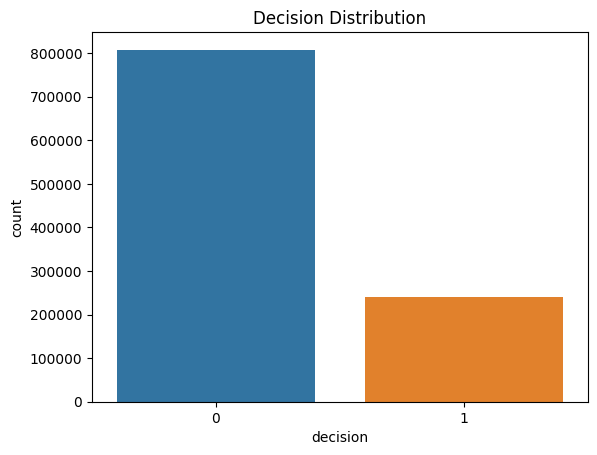

In [33]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for the 'decision' column in the given DataFrame
# This plot shows the distribution of the 'decision' variable, indicating the count of each unique value.
sns.countplot(x='decision', data=data)

# Set the title of the plot
plt.title('Decision Distribution')

# Display the plot
plt.show()

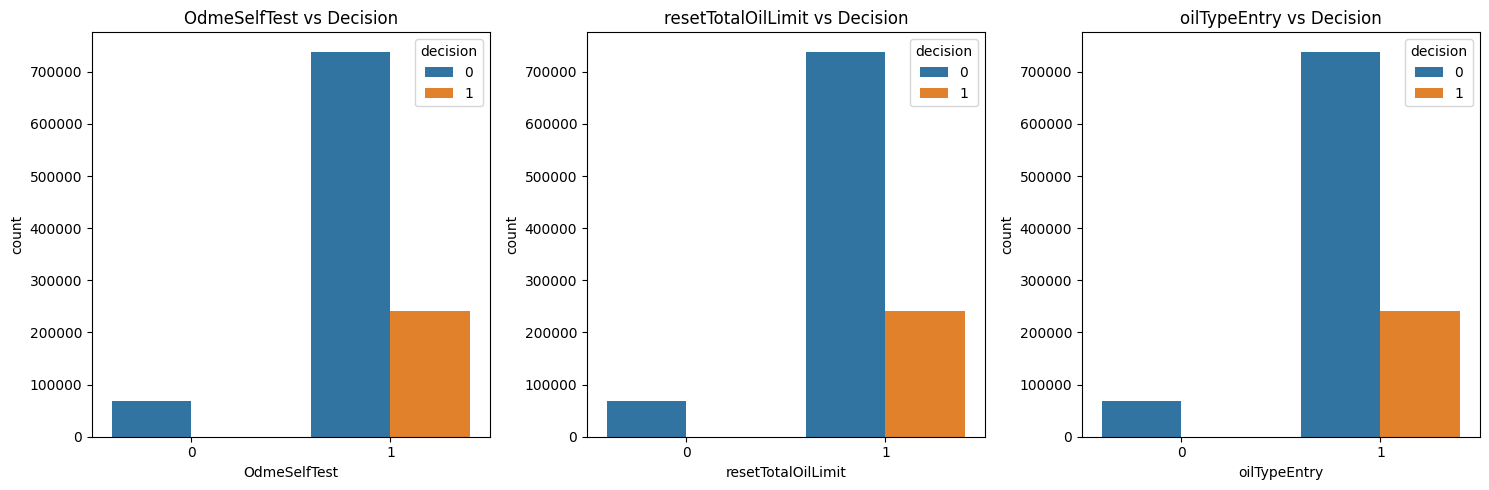

In [34]:
# Define a list of categorical columns to be analyzed
categorical_cols = ['OdmeSelfTest', 'resetTotalOilLimit', 'oilTypeEntry']

# Create subplots with 1 row and 3 columns, each with a specified size of (15, 5) inches
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterate through each categorical column and create a count plot for the distribution of 'decision' for each unique value
# This loop generates three subplots side by side, each showing the count of 'decision' for different values of a categorical column.
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='decision', data=data, ax=axes[i])

    # Set the title for each subplot based on the categorical column being analyzed
    axes[i].set_title(f'{col} vs Decision')

# Adjust the layout of the subplots for better presentation
plt.tight_layout()

# Display the subplots
plt.show()


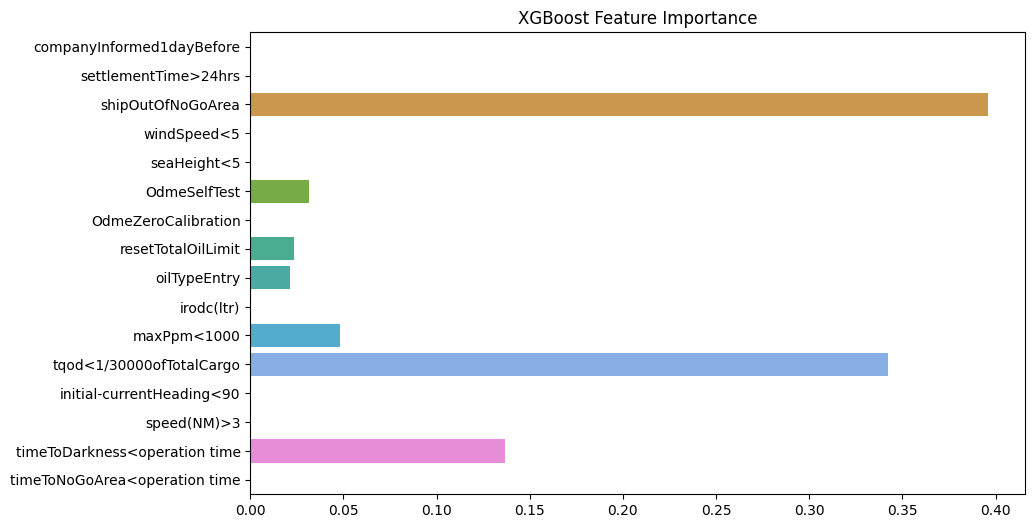

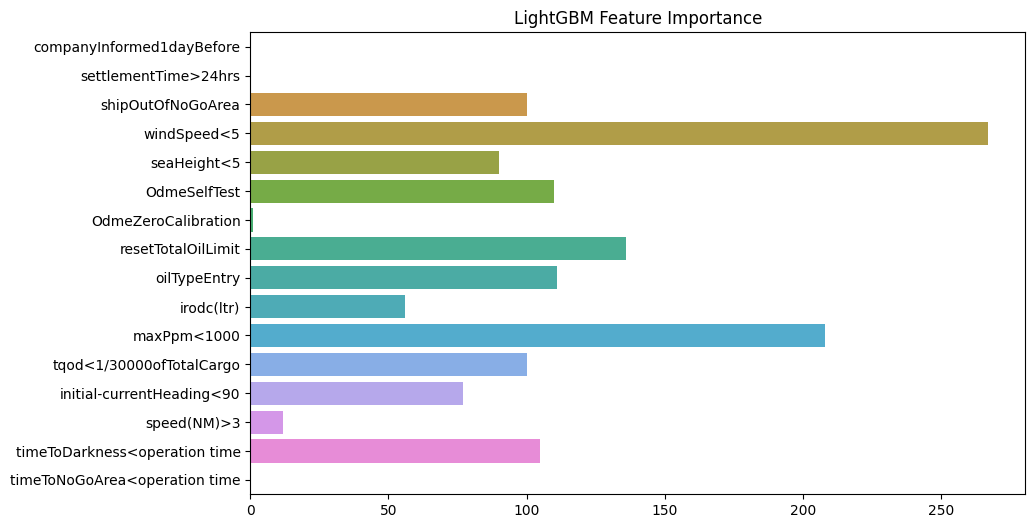

In [35]:
# Plot the feature importance of the XGBoost model
# Create a bar plot with feature importances on the x-axis and feature names on the y-axis
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_model.feature_importances_, y=X.columns)
plt.title('XGBoost Feature Importance')
plt.show()

# Plot the feature importance of the LightGBM model
# Create a bar plot with feature importances on the x-axis and feature names on the y-axis
plt.figure(figsize=(10, 6))
sns.barplot(x=lgbm_model.feature_importances_, y=X.columns)
plt.title('LightGBM Feature Importance')
plt.show()


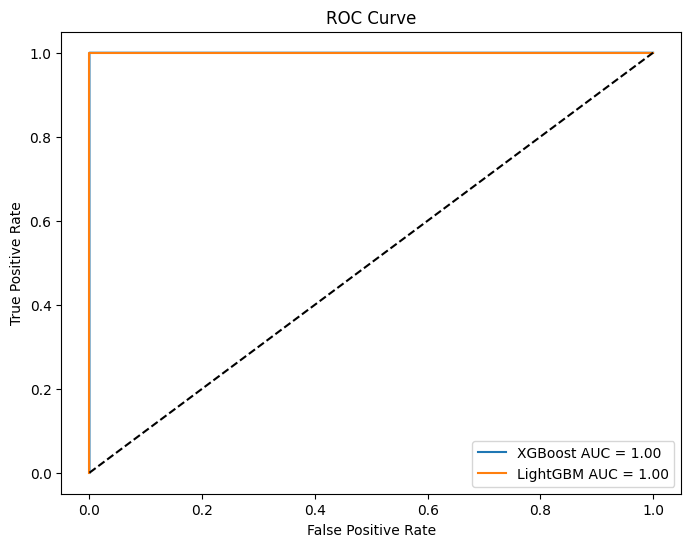

In [36]:
# Import necessary libraries for ROC curve analysis
from sklearn.metrics import roc_curve, auc

# Generate ROC curve for the XGBoost model
# Predict probabilities for the positive class and calculate the false positive rate (fpr) and true positive rate (tpr)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Generate ROC curve for the LightGBM model
# Predict probabilities for the positive class and calculate the false positive rate (fpr) and true positive rate (tpr)
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_prob_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

# Plot ROC curves for both models
# Create a figure with a size of (8, 6) inches
plt.figure(figsize=(8, 6))

# Plot the ROC curve for the XGBoost model with its AUC score
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost AUC = {roc_auc_xgb:.2f}')

# Plot the ROC curve for the LightGBM model with its AUC score
plt.plot(fpr_lgbm, tpr_lgbm, label=f'LightGBM AUC = {roc_auc_lgbm:.2f}')

# Plot the diagonal line representing a random classifier (no discrimination power)
plt.plot([0, 1], [0, 1], 'k--')

# Set labels and title for the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Display a legend in the lower right corner
plt.legend(loc='lower right')

# Show the ROC curve plot
plt.show()


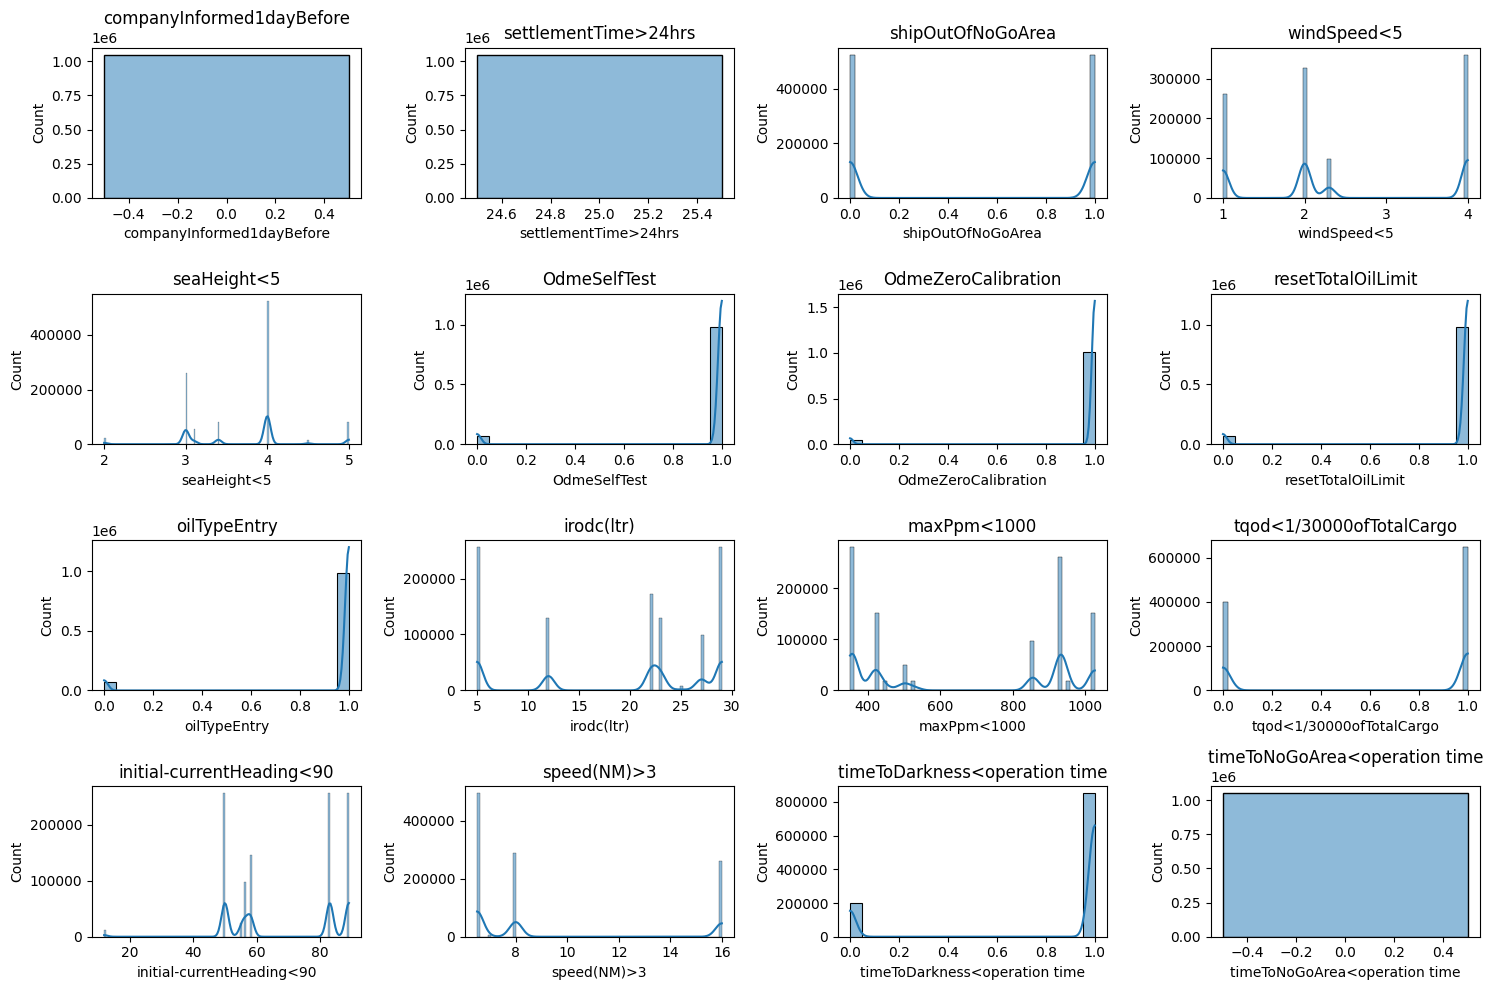

In [37]:
# Define a list of numeric columns for histogram analysis
numeric_cols = ['companyInformed1dayBefore', 'settlementTime>24hrs', 'shipOutOfNoGoArea', 'windSpeed<5', 'seaHeight<5', 'OdmeSelfTest', 'OdmeZeroCalibration', 'resetTotalOilLimit', 'oilTypeEntry', 'irodc(ltr)', 'maxPpm<1000', 'tqod<1/30000ofTotalCargo', 'initial-currentHeading<90', 'speed(NM)>3', 'timeToDarkness<operation time', 'timeToNoGoArea<operation time']

# Create subplots with 4 rows and 4 columns, each with a specified size of (15, 10) inches
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))

# Iterate through each numeric column and create a histogram using seaborn's histplot
# This loop generates a 4x4 grid of histograms, each showing the distribution of values for a numeric column.
for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], ax=axes[i//4, i%4], kde=True)
    axes[i//4, i%4].set_title(col)

# Adjust the layout of the subplots for better presentation
plt.tight_layout()

# Display the subplots
plt.show()


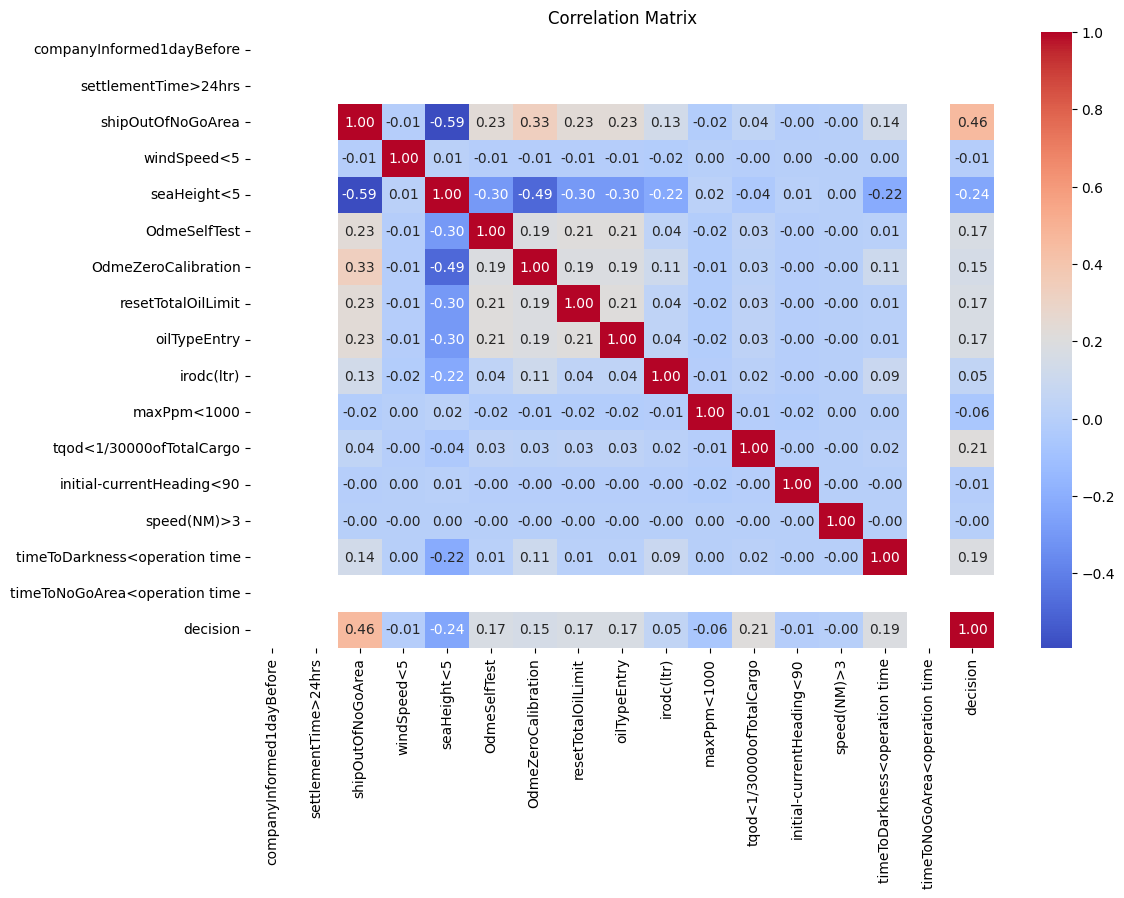

In [40]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


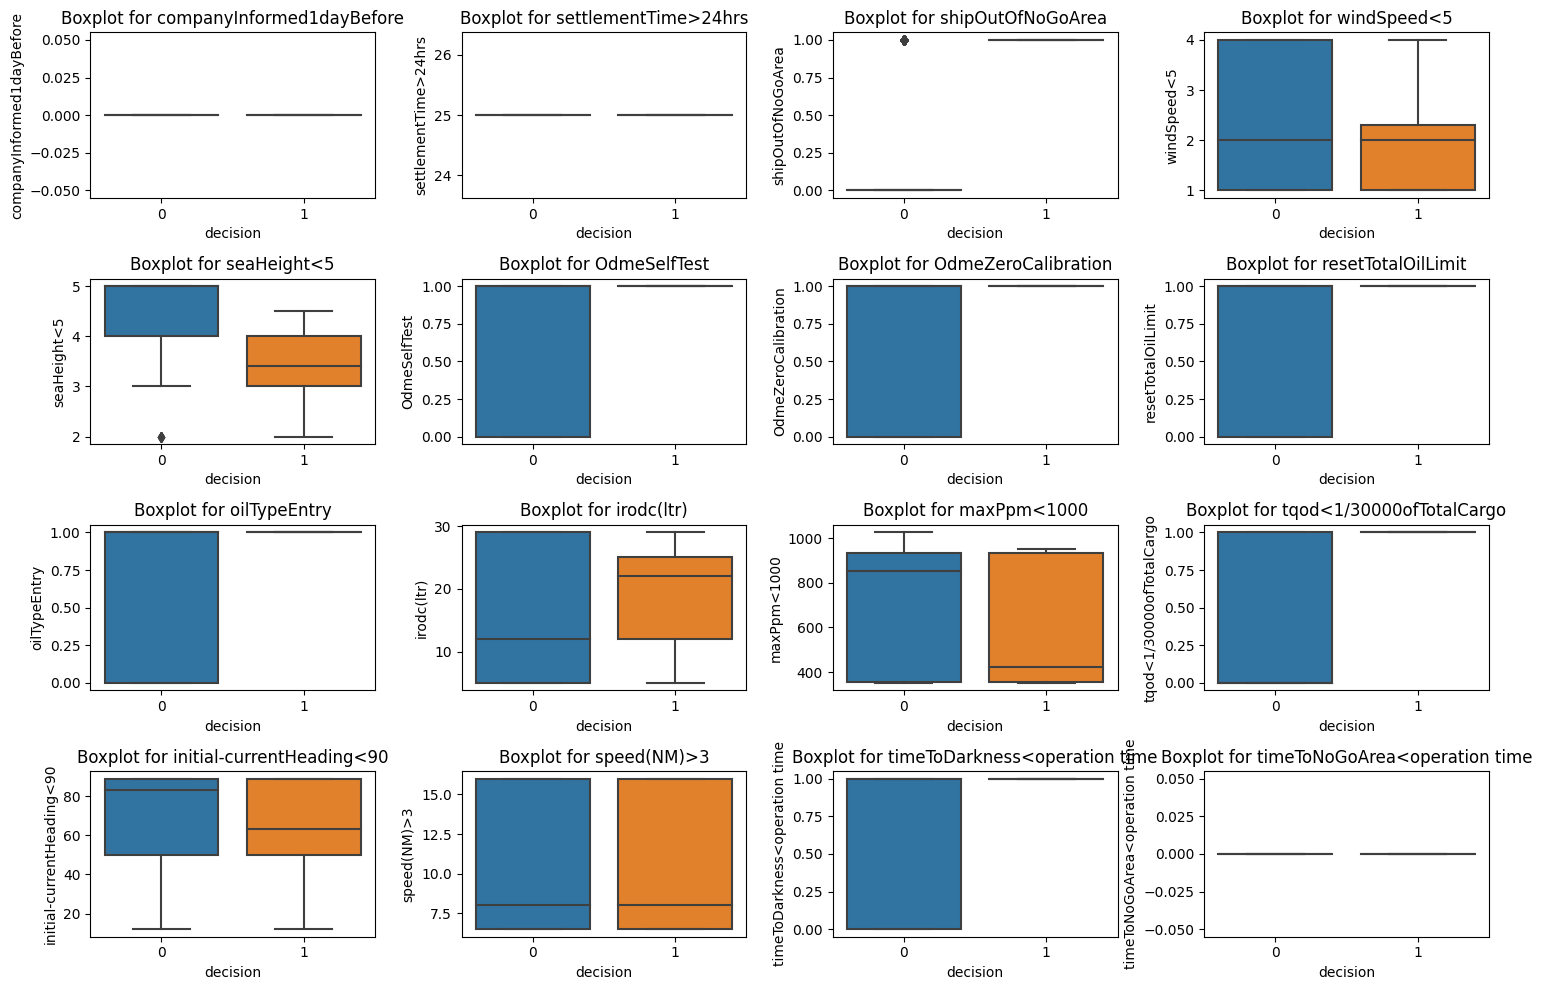

In [41]:
# Create boxplots for numeric columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x='decision', y=col, data=data)
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()
